In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
data = pd.read_csv('data\\train.csv')

In [3]:
# read matrix, transporent, split on x and y, normalize it

data = np.array(data).T
data_y = data[0]
data_x = data[1:] / 255

In [4]:
# read matrix x and vector y, transporent, normalize it

data_test_x = np.array(pd.read_csv('data\\test.csv')).T / 255
data_test_y = np.array(pd.read_csv('data\\sample_submission.csv')).T[1]

In [5]:
class Tool_for_paramter:
     
    def __init__(self, alpha, epoch) -> None:
        self.alpha = alpha
        self.epoch = epoch
        

    def save_parameter(self, accuracy):
       # create folder with weights and biases of correct accuracy
       self.folder = f'parameter/accuracy_{accuracy}'
       os.makedirs( self.folder, 0o774)
       
       np.savetxt(f'{self.folder}/weight1_alpha_{self.alpha}_epoch_{self.epoch}.txt',self.weight1)
       np.savetxt(f'{self.folder}/bias1_alpha_{self.alpha}_epoch_{self.epoch}.txt',self.bias1)
       np.savetxt(f'{self.folder}/weight2_alpha_{self.alpha}_epoch_{self.epoch}.txt',self.weight2)
       np.savetxt(f'{self.folder}/bias2_alpha_{self.alpha}_epoch_{self.epoch}.txt',self.bias2)


    def load_parametr(self, accuracy):
        def read_parametr(parametr):
            with open(f'{self.folder}/{parametr}_alpha_{self.alpha}_epoch_{self.epoch}.txt', 'r') as f:
                return f.read()
            
        self.weight1 = list(map(float, read_parametr('weight1').split()))
        self.bias1 = list(map(float, read_parametr('bias1').split()))
        self.weight2 = list(map(float, read_parametr('weight2').split()))
        self.bias2 = list(map(float, read_parametr('bias2').split())) 

In [38]:
class Perceptron(Tool_for_paramter):

    def __init__(self, train, train_y, alpha, epoch):
        self.epoch = epoch
        self.alpha = alpha
    
        self.train = train
        self.train_y = train_y

        self.row, self.column = train.shape

        self.weight1 = np.random.rand(10, 784) - 0.5
        self.bias1 = np.random.rand(10, 1) - 0.5

        self.weight2 = np.random.rand(10, 10) - 0.5
        self.bias2 = np.random.rand(10, 1) - 0.5
        super().__init__(alpha, epoch)
        

    def relu(self, f):
        return np.maximum(f, 0)
    

    def softmax(self, f):
        return (np.exp(f) / sum(np.exp(f)))
    

    def relu_deriv(self, f):
        return f > 0


    def one_hot(self, y):
        one_hot_y = np.zeros((y.size, y.max() + 1))
        one_hot_y[np.arange(y.size), y] = 1
        return one_hot_y.T
    

    def forward(self):
        self.z1 = self.weight1.dot(self.train) + self.bias1
        self.a1 = self.relu(self.z1)

        self.z2 = self.weight2.dot(self.a1) + self.bias2
        self.z = self.softmax(self.z2)
  

    def backward(self):
        self.dz2 = self.z - self.one_hot(self.train_y)
        self.dweight2 = self.dz2.dot(self.a1.T) / self.column
        self.dbias2 = np.sum(self.dz2) / self.column

        self.dz1 = self.weight2.T.dot(self.dz2) * self.relu_deriv(self.z1)
        self.dweight1 = self.dz1.dot(self.train.T) / self.column
        self.dbias1 =  np.sum(self.dz1) / self.column


    def update(self):
        self.weight1 = self.weight1 - self.alpha * self.dweight1
        self.bias1 = self.bias1 - self.alpha * self.dbias1

        self.weight2 = self.weight2 - self.alpha * self.dweight2
        self.bias2 = self.bias2 - self.alpha * self.dbias2


    def study(self):
        def get_accuracy(predictions, y):
            return np.sum(predictions == y) / y.size

        for i in range(self.epoch):
            self.forward()
            self.backward()
            self.update()

            if i % 10 == 0:
                print(f'Iteration: {i}\n{np.argmax(self.z, 0)} {self.train_y}\n{get_accuracy(np.argmax(self.z, 0), self.train_y)}')

    
    def test_prediction(self, index, x, y):
        current_image = x[:, index, None]

        z1 = self.weight1.dot(current_image) + self.bias1
        a1 = self.relu(z1)
        
        z2 = self.weight2.dot(a1) + self.bias2
        z = self.softmax(z2)
       
        prediction = np.argmax(z, 0)
        label = y[index]

        print(f'Prediction: {prediction}')
        print(f'Label: {label}')

        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

In [42]:
nn = Perceptron(data_x, data_y, 0.1, 600)
nn.study()

Iteration: 0
[7 7 1 ... 8 7 7] [1 0 1 ... 7 6 9]
0.05654761904761905
Iteration: 10
[3 3 1 ... 8 7 3] [1 0 1 ... 7 6 9]
0.17211904761904762
Iteration: 20
[1 3 1 ... 8 7 3] [1 0 1 ... 7 6 9]
0.20764285714285713
Iteration: 30
[1 3 1 ... 8 7 3] [1 0 1 ... 7 6 9]
0.23226190476190475
Iteration: 40
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.2746190476190476
Iteration: 50
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.2988095238095238
Iteration: 60
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.3198809523809524
Iteration: 70
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.34604761904761905
Iteration: 80
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.37152380952380953
Iteration: 90
[1 3 1 ... 7 7 7] [1 0 1 ... 7 6 9]
0.4011904761904762
Iteration: 100
[1 2 1 ... 7 6 7] [1 0 1 ... 7 6 9]
0.43233333333333335
Iteration: 110
[1 2 1 ... 7 6 7] [1 0 1 ... 7 6 9]
0.4615714285714286
Iteration: 120
[1 2 1 ... 7 6 7] [1 0 1 ... 7 6 9]
0.4936190476190476
Iteration: 130
[1 2 1 ... 7 6 7] [1 0 1 ... 7 6 9]
0.525
Iteration: 140
[1 2 1 ... 7 6 7] [1 0

Prediction: [0]
Label: 0


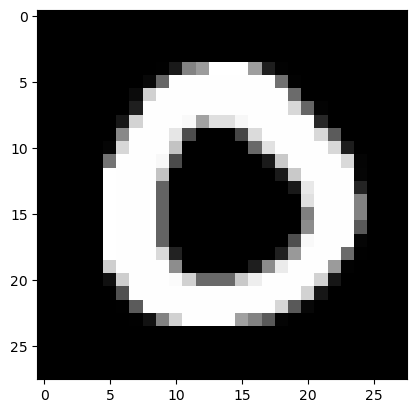

In [93]:
nn.test_prediction(4, data_x, data_y)

In [48]:
nn.save_parameter()

In [125]:
nn.load_parametr()